Epoch 10: Loss = nan
Epoch 20: Loss = nan
Epoch 30: Loss = nan
Epoch 40: Loss = nan
Epoch 50: Loss = nan
Epoch 60: Loss = nan
Epoch 70: Loss = nan
Epoch 80: Loss = nan
Epoch 90: Loss = nan
Epoch 100: Loss = nan


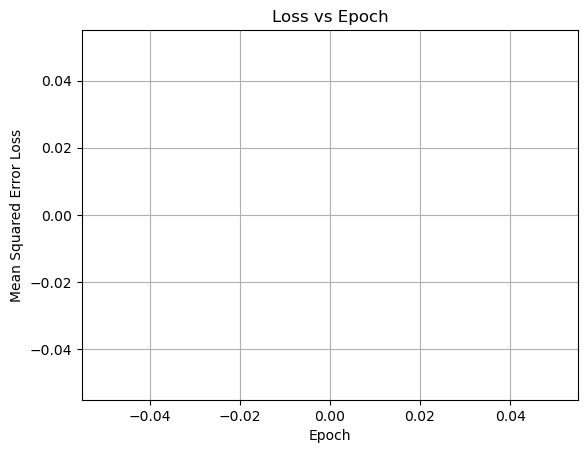

Predicted: nan, Actual: 23.60
Predicted: nan, Actual: 32.40
Predicted: nan, Actual: 13.60
Predicted: nan, Actual: 22.80
Predicted: nan, Actual: 16.10
Predicted: nan, Actual: 20.00
Predicted: nan, Actual: 17.80
Predicted: nan, Actual: 14.00
Predicted: nan, Actual: 19.60
Predicted: nan, Actual: 16.80


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset
data = pd.read_csv('BostonHousing.csv')

# 2. Feature selection
X = data.drop('medv', axis=1).values  # Features
y = data['medv'].values  # Target

# 3. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Initialize parameters
np.random.seed(42)
n_features = X_train.shape[1]
w = np.random.randn(n_features)  # weights
b = 0.0  # bias

# 6. Set hyperparameters
learning_rate = 0.01
epochs = 100
loss_history = []

# 7. Gradient Descent
for epoch in range(epochs):
    # Forward pass
    y_pred = np.dot(X_train, w) + b
    
    # Compute loss (MSE)
    loss = np.mean((y_pred - y_train) ** 2)
    loss_history.append(loss)
    
    # Compute gradients
    error = y_pred - y_train
    dw = (2 / X_train.shape[0]) * np.dot(X_train.T, error)
    db = (2 / X_train.shape[0]) * np.sum(error)
    
    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss:.4f}")

# 8. Plot loss vs epoch
plt.plot(range(epochs), loss_history)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.title('Loss vs Epoch')
plt.grid(True)
plt.show()

# 9. Evaluate on test data
y_test_pred = np.dot(X_test, w) + b

# Print some predictions vs actual
for i in range(10):
    print(f"Predicted: {y_test_pred[i]:.2f}, Actual: {y_test[i]:.2f}")
